# Exploratory Data Analysis

After data has been collected, cleaned, and combined, exploratory analysis can be used to better understand the data. 

**Inputs:** 

- Combined Data Pickle file (i.e. Combined_Social_Data_Pickle.pkl)

- MusicBrainz Data (i.e. musicbrainz_data.csv)

**Output:** 

- Data Visualizations

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_pickle('Combined_Social_Data_Pickle.pkl')
df_mb = pd.read_csv('musicbrainz_data.csv')

## Data Preparation

In [3]:
def clean_data_for_EDA(social_media_df, musicbrainz_df):
    '''
    Cleans and prepares the data for exploratory data analysis that follows below. 
    
    Inputs: 
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    musicbrainz_df = pandas dataframe of MusicBrainz data
    
    Outputs: 
    social_media_df = cleaned pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    musicbrainz_df = cleaned pandas dataframe of MusicBrainz data
    
    '''
    
    # convert to datetime
    social_media_df['created'] = pd.to_datetime(social_media_df['created'])
    musicbrainz_df['release_date'] = pd.to_datetime(musicbrainz_df['release_date'])
    
    # rename genre columns to be more understandable
    df.rename(columns={'genre_electronic':'Electronic', 'genre_hip_hop':'Hip Hop', 'genre_pop':'Pop', 
                       'genre_r_and_b':'R&B','genre_rock':'Rock', 'genre_world_music':'World Music', 
                       'years_active': 'Years Active', 'age': 'Age'}, inplace =True)
    
    # create platform column
    social_media_df["Social Platform"] =0
    social_media_df.loc[social_media_df['Facebook'] == 1, 'Social Platform'] = 'Facebook'
    social_media_df.loc[social_media_df['Instagram'] == 1, 'Social Platform'] = 'Instagram'
    social_media_df.loc[social_media_df['Twitter'] == 1, 'Social Platform'] = 'Twitter'
    social_media_df.loc[social_media_df['Youtube'] == 1, 'Social Platform'] = 'Youtube'
    
    ## create Time Range of Post Creation column
    social_media_df["Time Range of Post Creation"] = 0
    social_media_df.loc[social_media_df['created_12am-6am'] == 1, 'Time Range of Post Creation'] = '12am-6am'
    social_media_df.loc[social_media_df['created_12pm-6pm'] == 1, 'Time Range of Post Creation'] = '12pm-6pm'
    social_media_df.loc[social_media_df['created_6am-12pm'] == 1, 'Time Range of Post Creation'] = '6am-12pm'
    social_media_df.loc[social_media_df['created_6pm-12am'] == 1, 'Time Range of Post Creation'] = '6pm-12am'
    
    ## create Post Type column
    social_media_df["Post Type"] = 0
    social_media_df.loc[social_media_df['type_link'] == 1, 'Type of Post'] = 'Link'
    social_media_df.loc[social_media_df['type_photo'] == 1, 'Type of Post'] = 'Photo'
    social_media_df.loc[social_media_df['type_text'] == 1, 'Type of Post'] = 'Text'
    social_media_df.loc[social_media_df['type_video'] == 1, 'Type of Post'] = 'Video'

    return (social_media_df, musicbrainz_df)    

In [4]:
(df, df_mb) = clean_data_for_EDA(df, df_mb)

In [5]:
# define genres of interest (to be explored)
genres = ['Electronic', 'Hip Hop', 'Pop', 'R&B', 'Rock', 'World Music']

## Exploratory Analysis

### _Explore All Artists_

#### Shape of Data

In [6]:
print("There are %d observations." % df.shape[0])
print("There are %d features." % df.shape[1])

There are 1084355 observations.
There are 46 features.


#### Feature List with Data Types

In [7]:
df.dtypes.to_frame()

,0
Facebook,int64
Instagram,int64
Twitter,int64
Youtube,int64
Age,int64
artist_name_x,object
artist_name_y,object
count_of_followers,float64
created,datetime64[ns]
created_12am-6am,int64


#### Artists' Post Types

In [8]:
def post_type_plot(social_media_df):
    '''
    Plots number of post types
    
    Input: 
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    '''
    
    ax = social_media_df['Type of Post'].value_counts().plot(kind='bar', rot=45,  figsize=(9,4))
    ax.set_title("Artists' Post Types")
    ax.set_xlabel("Post Type")
    ax.set_ylabel("Count of Posts")
    plt.show()

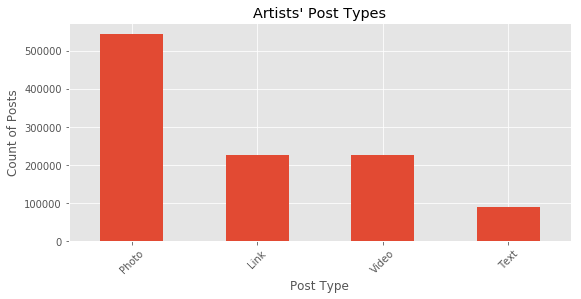

In [9]:
post_type_plot(df)

#### Artists by Genre

In [10]:
def genre_plot(social_media_df, genres):
    '''
    Plots number of artists by genres
    
    Input: 
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    genres = list of genres to be plotted
    '''
    
    # count number of artists per genre
    df_artists_genres = social_media_df[['artist_name_y', 'Electronic', 'Hip Hop', 'Pop', 'R&B', 'Rock', 'World Music']].drop_duplicates()
    df_artists_genres_plot = df_artists_genres[genres].sum()
    
    # plot
    ax = df_artists_genres_plot.plot.bar(rot=45,  figsize=(12,5))
    ax.set_title("Artists by Genre")
    ax.set_xlabel("Genre")
    ax.set_ylabel("Count of Artists")
    plt.show()

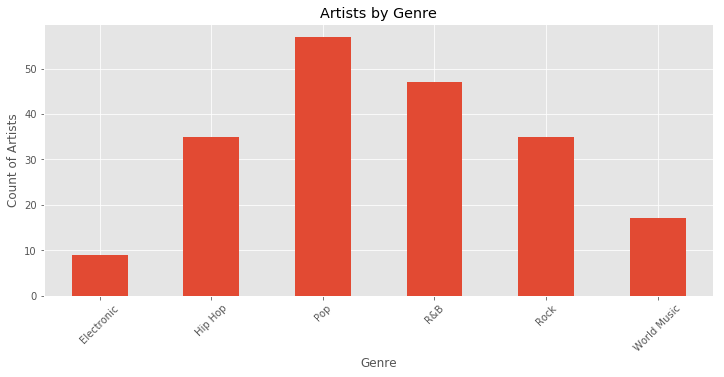

In [11]:
genre_plot(df, genres)

#### Artists' Posts by Genre across Platforms

In [12]:
def posts_by_genre_across_platform(social_media_df, genres):
    '''
    Plots posts by genre across the four social media platforms (Twitter, Facebook, Instagram, Youtube)
    
    Input: 
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    genres = list of genres to be plotted
    '''
    
    df_posts_genres_platforms = social_media_df[['created', 'Social Platform', 'Electronic', 'Hip Hop', 'Pop', 'R&B', 'Rock', 'World Music']]

    # plot with posts by genre across platforms:
    df_posts_genres_platforms = df_posts_genres_platforms.groupby('Social Platform')[genres].sum()
    df_posts_genres_platforms_plot = df_posts_genres_platforms.T
    ax = df_posts_genres_platforms_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(10,5))
    ax.set_title("Artists' Posts by Genre across Platforms")
    ax.set_xlabel("Genre")
    ax.set_ylabel("Count of Posts")
    
    # plot with posts by genre across platforms with percent breakdown:
    df_posts_genres_platforms = df_posts_genres_platforms.groupby('Social Platform')[genres].sum()
    df_posts_genres_platforms_plot = df_posts_genres_platforms.div(df_posts_genres_platforms.sum())
    totals = df_posts_genres_platforms.sum()
    df_posts_genres_platforms_plot = df_posts_genres_platforms_plot.T
    ax1 = df_posts_genres_platforms_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(10,5))
    ax1.set_title("Artists' Posts by Genre across Platforms: Percentage Breakdown")    
    ax1.set_xlabel("Genre")
    ax1.set_ylabel("Percent of Total Posts")
    
    plt.show()

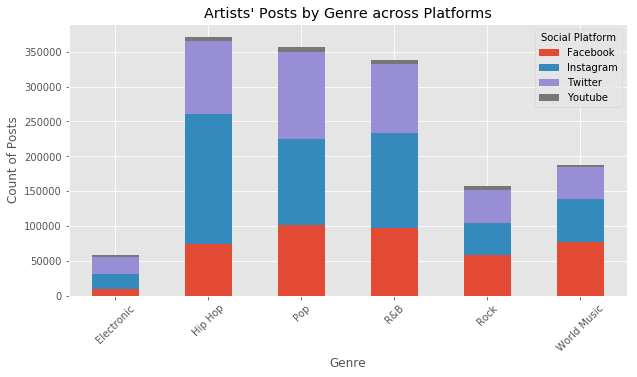

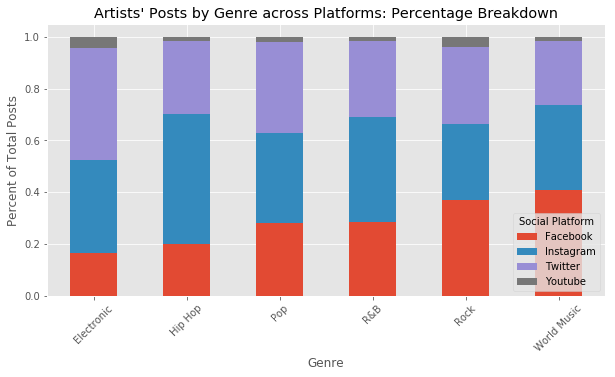

In [13]:
posts_by_genre_across_platform(df, genres)

#### Artists' Posts by Genre across Times of Day

In [14]:
def posts_by_genre_across_timesofday(social_media_df, genres):
    '''
    Plots posts by genre across times of day
    
    Input: 
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    genres = list of genres to be plotted
    '''
    
    df_posts_genres_timeranges = social_media_df[['created', 'Time Range of Post Creation', 'Electronic', 'Hip Hop', 'Pop', 'R&B', 'Rock', 'World Music']]

    # plot with posts by genre across times of day:
    df_posts_genres_timeranges = df_posts_genres_timeranges.groupby('Time Range of Post Creation')[genres].sum()
    df_posts_genres_timeranges_plot = df_posts_genres_timeranges.T
    ax = df_posts_genres_timeranges_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(10,5))
    ax.set_title("Artists' Posts by Genre across Times of Day")
    ax.set_xlabel("Genre")
    ax.set_ylabel("Count of Posts")
    
    # plot with posts by genre across times of day with percent breakdown:
    df_posts_genres_timeranges = df_posts_genres_timeranges.groupby('Time Range of Post Creation')[genres].sum()
    df_posts_genres_timeranges_plot = df_posts_genres_timeranges.div(df_posts_genres_timeranges.sum())
    totals = df_posts_genres_timeranges.sum()
    df_posts_genres_timeranges_plot = df_posts_genres_timeranges_plot.T
    ax1 = df_posts_genres_timeranges_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(10,5))
    ax1.set_title("Artists' Posts by Genre across Times of Day: Percentage Breakdown")    
    ax1.set_xlabel("Genre")
    ax1.set_ylabel("Percent of Total Posts")
    
    plt.show()

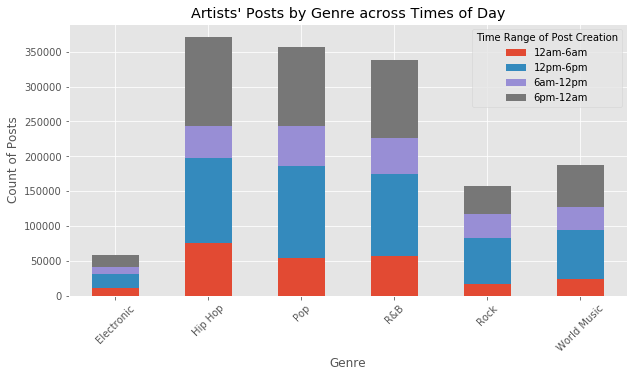

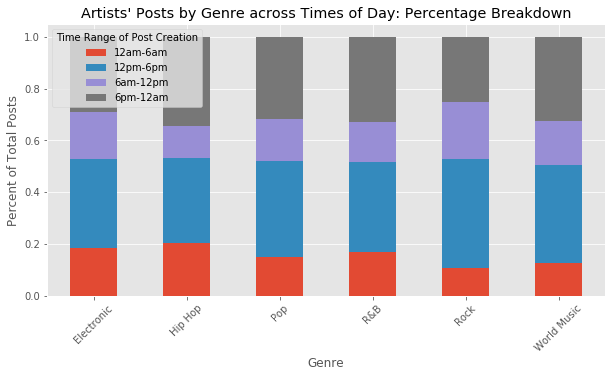

In [15]:
posts_by_genre_across_timesofday(df, genres)

#### Artists' Posts by Genre across Post Types

In [16]:
def posts_by_genre_across_posttypes(social_media_df, genres):
    '''
    Plots posts by genre across post types for the four social media platforms (Twitter, Facebook, Instagram, Youtube)
    
    Input: 
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    genres = list of genres to be plotted
    '''
    
    df_posts_genre_posttype_byplatform = social_media_df[['created', 'Social Platform', 'Type of Post', 'Electronic', 'Hip Hop', 'Pop', 'R&B', 'Rock', 'World Music']]
    df_posts_genre_posttype_byplatform_FB = df_posts_genre_posttype_byplatform[df_posts_genre_posttype_byplatform['Social Platform']=='Facebook']
    df_posts_genre_posttype_byplatform_Instagram = df_posts_genre_posttype_byplatform[df_posts_genre_posttype_byplatform['Social Platform']=='Instagram']
    df_posts_genre_posttype_byplatform_Twitter = df_posts_genre_posttype_byplatform[df_posts_genre_posttype_byplatform['Social Platform']=='Twitter']
    df_posts_genre_posttype_byplatform_Youtube = df_posts_genre_posttype_byplatform[df_posts_genre_posttype_byplatform['Social Platform']=='Youtube']
    totals=[0,0,0,0]
    platform_dfs = [df_posts_genre_posttype_byplatform_FB, df_posts_genre_posttype_byplatform_Instagram, df_posts_genre_posttype_byplatform_Twitter, df_posts_genre_posttype_byplatform_Youtube]
    platform_names = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
    for i in range(len(platform_dfs)):
        platform_dfs[i] = platform_dfs[i].groupby('Type of Post')[genres].sum()
        df_posts_genre_timerange_plot = platform_dfs[i].div(platform_dfs[i].sum())
        totals[i] = platform_dfs[i].sum()
        d_plot = df_posts_genre_timerange_plot.T
        ax = d_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(10,5))
        ax.set_xlabel("Genre")
        ax.set_ylabel("Percent of Total Posts")
        ax.set_title(platform_names[i])
        ax.legend(loc=(1.04,0))
        
        plt.show()

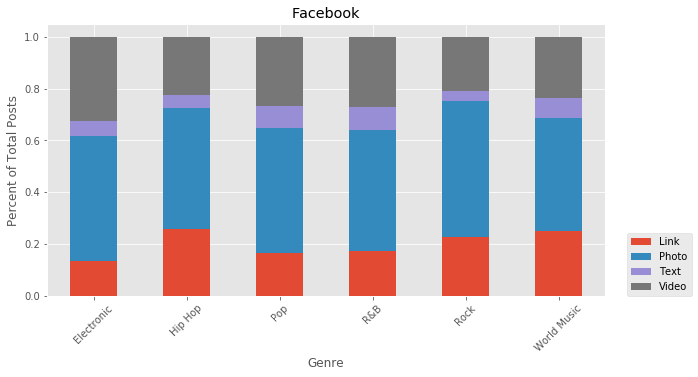

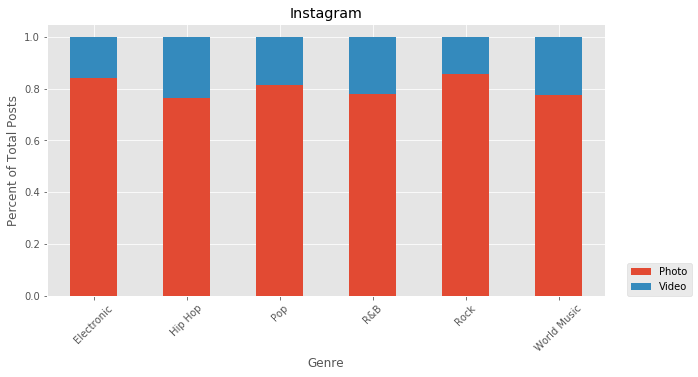

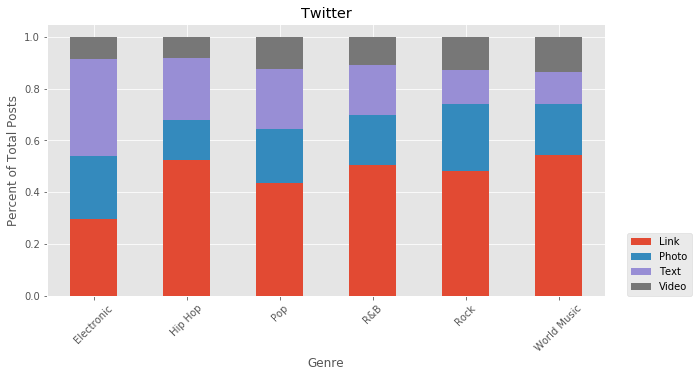

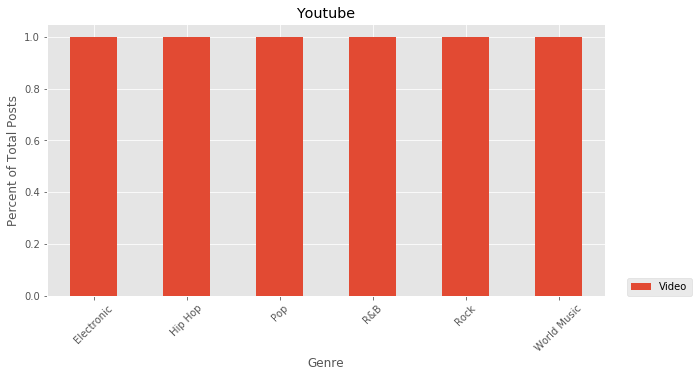

In [17]:
posts_by_genre_across_posttypes(df, genres)

#### Artists' Age across Genres

In [18]:
def artist_cont_feature_by_genre(social_media_df, genres, artist_continuous_feature):
    '''
    Plots distribution of a continuous feature of artists across genres (i.e. Age, Years Active)
    
    Inputs: 
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    genres = list of genres to be plotted
    artist_continuous_feature = continuous feature to be plotted across genres (i.e. Age, Years Active)
    '''
    
    df_artists_genres = social_media_df[['artist_name_y', 'Age', 'Years Active', 'Electronic', 'Hip Hop', 'Pop', 'R&B', 'Rock', 'World Music']].drop_duplicates()

    fig, ax = plt.subplots(figsize=(13,7))
    for position, genre in enumerate(genres):
        df_artists_genres_1 = df_artists_genres[df_artists_genres[genre]==1]
        df_artists_genres_1[genre] = df_artists_genres_1[artist_continuous_feature]*df_artists_genres_1[genre]
        ax.violinplot(df_artists_genres_1[genre], positions = [position], showmedians=True)

    ax.set_xticks(range(position+1))
    ax.set_xticklabels(genres, rotation = 45)
    ax.set_xlim(xmin=-0.5)
    ax.set_ylabel("Artist's %s" %artist_continuous_feature)
    ax.set_xlabel("Genre")
    
    plt.show()

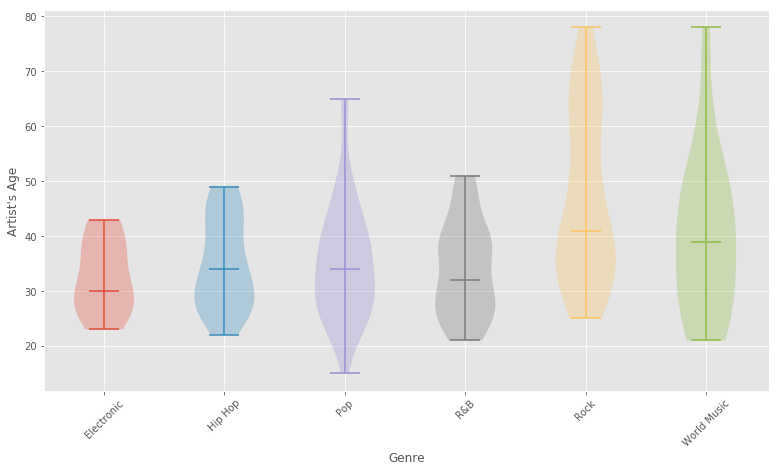

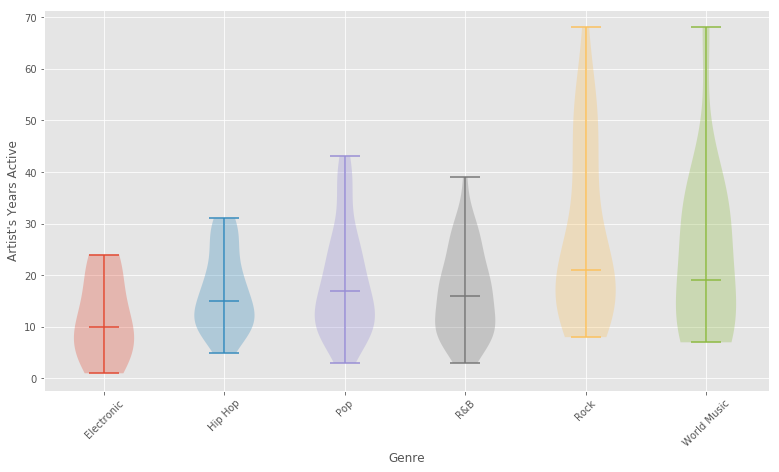

In [19]:
artist_cont_feature_by_genre(df, genres, 'Age')
artist_cont_feature_by_genre(df, genres, 'Years Active')

#### Artists' Posts' Social Engagement Scores across Genres

In [20]:
def social_eng_score_across_genre(social_media_df, genres):
    '''
    Plots distribution of a social engagement score of artists' posts across genres
    
    Inputs: 
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    genres = list of genres to be plotted
    
    Note: Adjust y-scale of plots of each platform as required. 
    '''
        
    df_artists_ses_genres = social_media_df[['artist_name_y', 'Social Platform', 'social_engagement_score', 'Electronic', 'Hip Hop', 'Pop', 'R&B', 'Rock', 'World Music']].drop_duplicates()

    df_artists_ses_genres_Instagram = df_artists_ses_genres[df_artists_ses_genres['Social Platform']=='Instagram']
    df_artists_ses_genres_FB = df_artists_ses_genres[df_artists_ses_genres['Social Platform']=='Facebook']
    df_artists_ses_genres_Twitter = df_artists_ses_genres[df_artists_ses_genres['Social Platform']=='Twitter']
    df_artists_ses_genres_Youtube = df_artists_ses_genres[df_artists_ses_genres['Social Platform']=='Youtube']

    platforms = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
    for platform in platforms:
        df_artists_ses_genres_1 = df_artists_ses_genres[df_artists_ses_genres['Social Platform']==platform]
        fig, ax = plt.subplots(figsize=(10,5))
        for position, genre in enumerate(genres):
            df_artists_ses_genres_1[df_artists_ses_genres_1[genre]==1].boxplot(column='social_engagement_score', positions = [position])

        ax.set_xticks(range(position+1))
        ax.set_xticklabels(genres, rotation = 45)
        ax.set_xlim(xmin=-0.5)
        ax.set_ylabel("Social Engagement Score")
        ax.set_xlabel("Genre")
        if platform == 'Facebook':
            ax.set_ylim((-.001,0.02))
        if platform == 'Instagram':
            ax.set_ylim((-0.02,0.15))
        if platform == 'Twitter':
            ax.set_ylim((-.0005,0.0075))
        if platform == 'Youtube':
            ax.set_ylim((-0.3,6))
        ax.set_title("Social Engagement Scores across Genres: %s" %platform)
        
        plt.show()

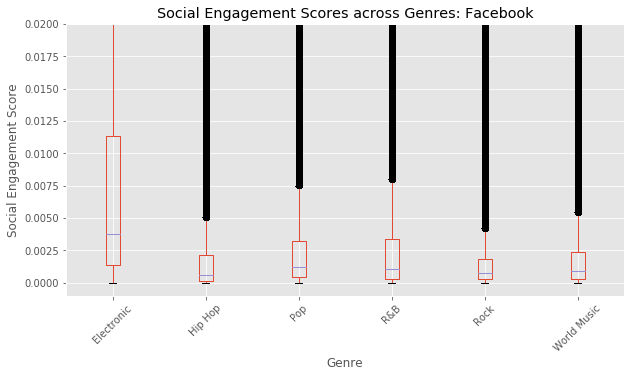

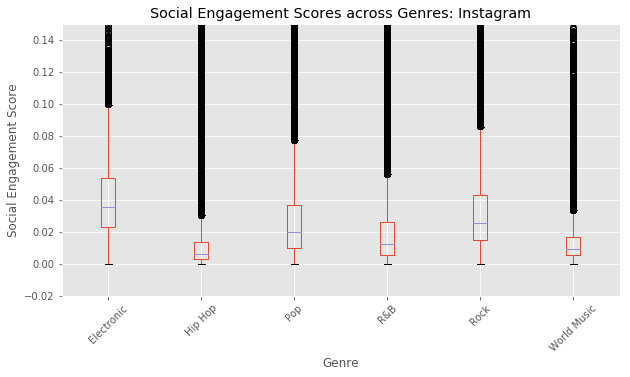

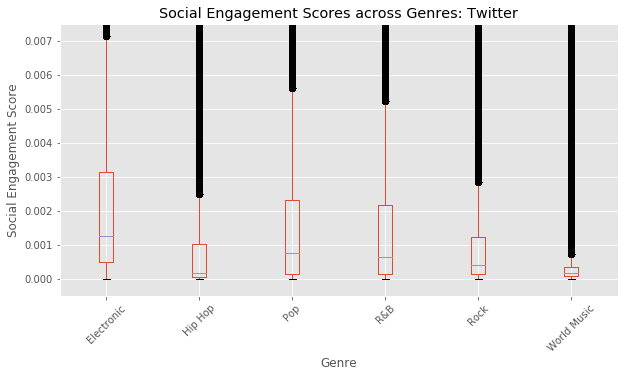

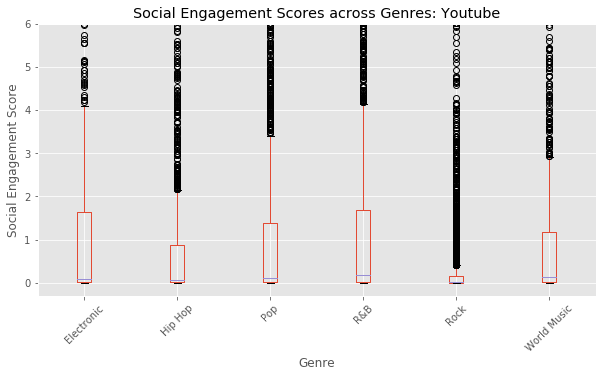

In [21]:
social_eng_score_across_genre(df, genres)

### _Explore One Artist_

#### Artist's Posts Overtime with Release Dates

In [22]:
def artist_social_plot(social_media_df, artist, start, finish = '2019-12-01 00:00:00'):
    '''
    Plots a chart showing the social media engagement scores of Facebook, Instagram, Twitter on the left axis
    and Youtube on the right axis (due to differences in scale). 
    
    Inputs:
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    artist = name of artist (i.e. 'Justin Timberlake')
    start = date from which posts and album and track releases should be included (format: '2015-01-01 00:00:00')
    finish = date until which posts and album and track releases should be included (format: '2015-01-01 00:00:00')
    
    Output:
    df_top_posts = pandas dataframe of top posts of inputted artist and in inputted time range 
    
    '''
    
    # set up social media dataframe
    df_temp = social_media_df[social_media_df['artist_name_y'] == artist]
    df_temp = df_temp[(df_temp['created']>pd.to_datetime(start)) & (df_temp['created']<pd.to_datetime(finish))]
    
    # set up release date dataframe
    df_mb_temp = df_mb[df_mb['artist_name'] == artist]
    df_mb_temp.sort_values('release_date', inplace=True)
    
    # reduce timeframe on release date dataframe
    df_mb_temp = df_mb_temp[(df_mb_temp['release_date']>min(df_temp['created'])) & 
                           (df_mb_temp['release_date']<max(df_temp['created']))]
    
    social_channels = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
    
    # Create a date range for each social media platform and uses # of periods equal to # of posts for X axis.
    # For y axis, only grabs the social engagement scores for that platform

    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(1,1,1)
    ax2 = ax.twinx()
    for social in social_channels:
        daterange = pd.date_range(min(df_temp[df_temp[social]==1]['created']),
                                    max(df_temp[df_temp[social]==1]['created']),
                                    periods=len(df_temp[df_temp[social] == 1]['normalized_social_engagement_score']))
        if (social == 'Youtube'):
            ax2.plot(daterange,df_temp[df_temp[social] == 1]['social_engagement_score'],'C7')
        else:
            ax.plot(daterange,df_temp[df_temp[social] == 1]['normalized_social_engagement_score'])


    
    ax.set_ylabel('Social Media Engagement Score: Facebook, Instagram, Twitter')
    ax2.set_ylabel('Social Media Engagement Score: Youtube')
    ax.set_xlabel('Time')

    #-------------------------------------------------------------------------------
    #Plot dots for release dates

    y = [5] * len(df_mb_temp['release_date'])

    ax.scatter(df_mb_temp['release_date'], y, c='red')
    
    plt.title(artist + " Social Media Engagement Scores and Album/Track Release Dates")
    
    leg = social_channels[:3] + ['Album/Track Releases']
    ax.legend(leg, loc=1) 
    ax2.legend(['Youtube'],loc=5)

    plt.show()

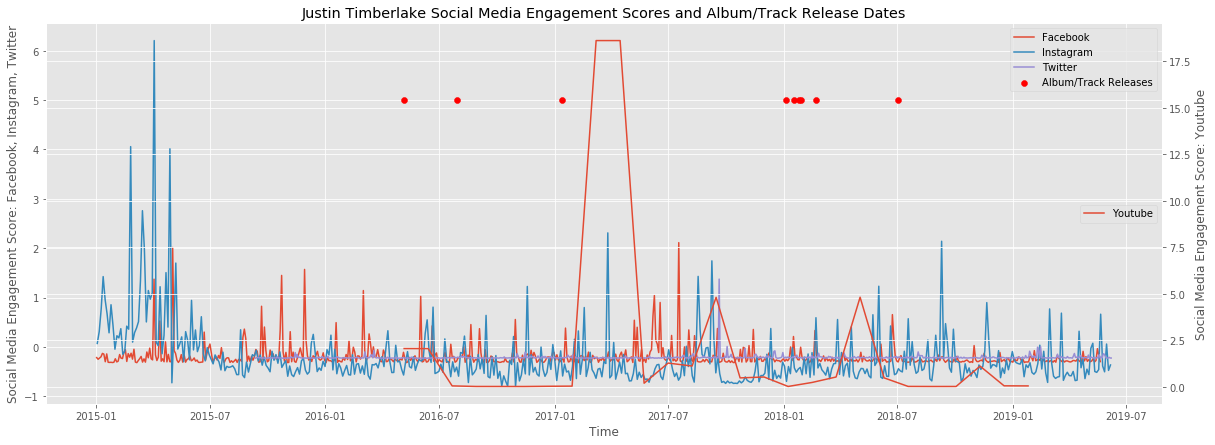

In [23]:
artist_social_plot(df, 'Justin Timberlake', '2015-01-01 00:00:00')

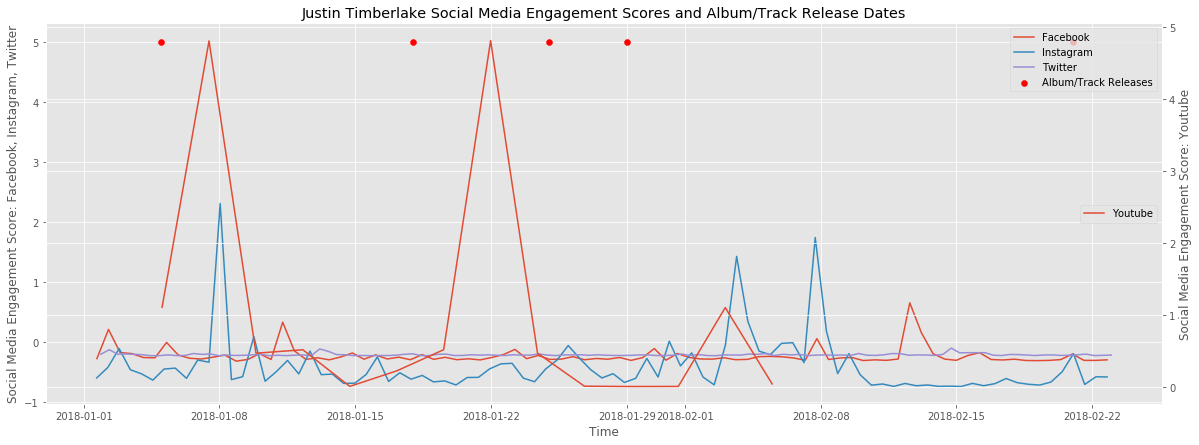

In [24]:
## Zoomed into specific Date range
artist_social_plot(df, 'Justin Timberlake', '2018-01-01 00:00:00','2018-03-01 00:00:00')

#### Artist's Top Posts

In [25]:
def top_posts(social_media_df, artist, platform, start = '2016-01-01 00:00:00', finish = '2019-12-01 00:00:00'):
    '''
    Provides the top posts for a specific artist and platform. 
    
    Inputs:
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    artist = name of artist (i.e. 'Justin Timberlake')
    platform = a social media platform (i.e. 'Facebook')
    start = date from which posts should be included (format: '2015-01-01 00:00:00')
    finish = date until which posts should be included (format: '2015-01-01 00:00:00')
    
    Output:
    df_top_posts = pandas dataframe of top posts of inputted artist and in inputted time range 
    
    '''
    
    df_top_posts = social_media_df[(social_media_df['artist_name_y']==artist) & (social_media_df[platform]==1) &
              (social_media_df['created']>pd.to_datetime(start)) & (social_media_df['created']<pd.to_datetime(finish))
      ].sort_values('social_engagement_score',ascending=False)[
        ['created','description','social_engagement_score','crowdtangle_score','time_since_last_post',
        ]][:10]  
    
    return df_top_posts

In [26]:
top_posts(df, 'Justin Timberlake', 'Facebook', '2018-01-01 00:00:00','2018-03-01 00:00:00').head()

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
212413,2018-02-04 19:53:50,⚠️Two minute warning. ⚠️ Jordan #SBLII,0.009499,22.73,0 days 04:15:07.000000000
212359,2018-01-07 18:15:04,When you roll in with a 2-time nominee... #Gol...,0.006350,16.81,0 days 01:13:33.000000000
212344,2018-01-02 10:18:36,FRIDAY... http://tmbr.lk/site,0.005166,13.68,0 days 17:56:44.000000000
212414,2018-02-04 20:53:51,#SBLII #PepsiHalftime Pepsi NFL #MOTW,0.004632,11.08,0 days 01:00:01.000000000
212405,2018-02-02 14:09:13,Just made a #targetrun and got my limited edit...,0.003668,9.71,0 days 03:23:22.000000000


#### Artist's Posts in a Given Date Range

In [27]:
def posts_in_range(social_media_df, social_media_platform, artist, start, finish):
    '''
    Provides the posts for a specific artist within a certain time range. 
    
    Inputs:
    social_media_df = pandas dataframe of combined social media data (Twitter, Facebook, Instagram, Youtube)
    social_media_platform = name of social media platform (i.e. 'Facebook')
    artist = name of artist (i.e. 'Justin Timberlake')
    start = date from which posts should be included (format: '2015-01-01 00:00:00')
    finish = date until which posts should be included (format: '2015-01-01 00:00:00')
    
    Output:
    df_posts_in_range = pandas dataframe of posts of inputted artist and in inputted time range 

    '''
    
    df_posts_in_range = social_media_df[(social_media_df['social_platform']==social_media_platform) & (social_media_df['artist_name_y']==artist) & (social_media_df['created']>pd.to_datetime(start))
              & (social_media_df['created']<pd.to_datetime(finish))
      ].sort_values('social_engagement_score',ascending=False)[
        ['created', 'description','social_engagement_score','crowdtangle_score','time_since_last_post',
        ]] 
    
    return df_posts_in_range

In [28]:
posts_in_range(df, 'Facebook', 'Justin Timberlake', '2018-01-01', '2018-03-01').head()

,created,description,social_engagement_score,crowdtangle_score,time_since_last_post
212413,2018-02-04 19:53:50,⚠️Two minute warning. ⚠️ Jordan #SBLII,0.009499,22.73,0 days 04:15:07.000000000
212359,2018-01-07 18:15:04,When you roll in with a 2-time nominee... #Gol...,0.006350,16.81,0 days 01:13:33.000000000
212344,2018-01-02 10:18:36,FRIDAY... http://tmbr.lk/site,0.005166,13.68,0 days 17:56:44.000000000
212414,2018-02-04 20:53:51,#SBLII #PepsiHalftime Pepsi NFL #MOTW,0.004632,11.08,0 days 01:00:01.000000000
212405,2018-02-02 14:09:13,Just made a #targetrun and got my limited edit...,0.003668,9.71,0 days 03:23:22.000000000
